# 回帰

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 1次元

In [2]:
def reg1dim2(x, y):
    n = len(x)
    an = np.dot(x, y) - x.sum()*y.sum() / n
    ad = (x**2).sum() - x.sum()**2 / n
    a = an / ad
    b = ( y.sum() - a*x.sum() ) /n
    return a,b

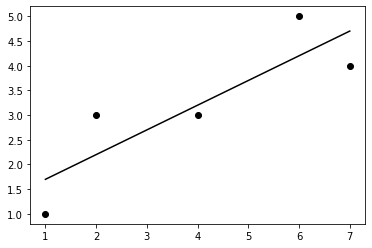

In [3]:
x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])

a, b = reg1dim2(x, y)

plt.scatter(x, y, color="k")
xp = [x.min(), x.max()]
yp = [a*x.min() +b, a*x.max() + b]
plt.plot(xp ,yp, color="k")
plt.show()

## 多次元

$ y = \boldsymbol{\omega^T\tilde{x}}$\
$ \boldsymbol{\tilde{y}(\omega) = \tilde{X}\omega}$\
$ \boldsymbol{\omega = (\tilde{X}^T\tilde{X})^{-1}\tilde{X}^Ty}$

In [4]:
from solver import LinearRegression
from mpl_toolkits.mplot3d import axes3d

In [5]:
n = 1000
scale = 10

w0, w1, w2 = 1, 2, 3
X = np.random.random((n, 2)) * scale
w = np.array([w1, w2])
y = w0 + np.dot(X, w) + np.random.randn(n)

#y = w0 + w1 * X[:, 0] + w2 * X[:, 1]

model = LinearRegression()
model.fit(X, y)
print("係数: ", model.w_)

係数:  [0.93849653 1.99805728 3.0132279 ]


In [6]:
print("(1, 1)に対する予測値: ", model.predict(np.array([1, 1])))
print("(1, 1)に対する正解値: ", (1 + 2 * 1 + 3 * 1))

(1, 1)に対する予測値:  [5.94978171]
(1, 1)に対する正解値:  6


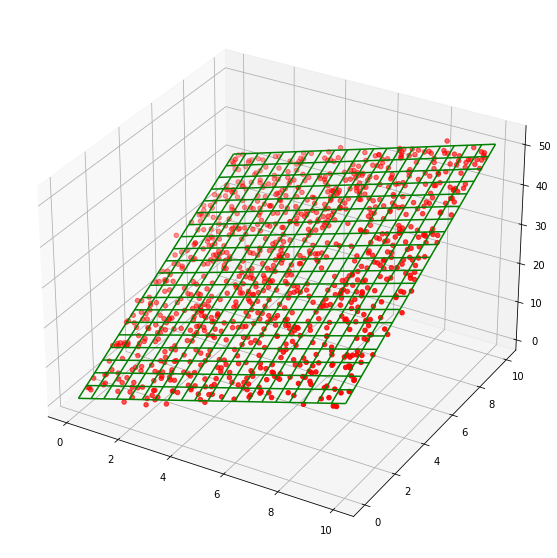

In [7]:
xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 21), np.linspace(0, scale, 21))
Xmesh = np.c_[np.ones(xmesh.size), xmesh.ravel(), ymesh.ravel()]
zmesh = np.dot(Xmesh, model.w_)
zmesh = zmesh.reshape(xmesh.shape)
#print(zmesh)
#print(xmesh)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color="r")
ax.plot_wireframe(xmesh, ymesh, zmesh, color="g")
plt.show()

## 実践的な例

In [8]:
import os, subprocess
import csv

In [9]:
filename = "winequality-red.csv"
if not os.path.isfile(filename):
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    result = subprocess.run(['curl', '-O', url], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    print(result)

In [10]:
Xy = []
with open(filename) as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64) # 1行目はヘッダーのため削除

In [11]:
# 訓練データとテストデータの分類
np.random.seed(0)
np.random.shuffle(Xy)

train_x = Xy[:-1000, :-1]
train_y = Xy[:-1000, -1]
test_x = Xy[-1000:, :-1]
test_y = Xy[-1000:, -1]

In [12]:
# 学習と予測
model = LinearRegression()
model.fit(train_x, train_y)
y = model.predict(test_x)

In [13]:
rmse = np.sqrt( ((y - test_y) ** 2).mean() )
print("RMSE: ", rmse)

RMSE:  0.6724248548470456


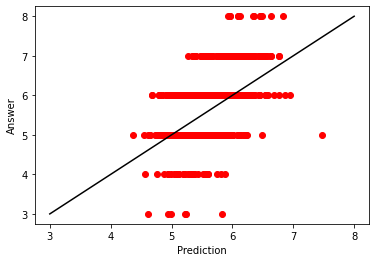

In [14]:
plt.scatter(y, test_y, color="r")

xp = [3, 8]
yp = [3, 8]
plt.plot(xp ,yp, color="k")

plt.xlabel("Prediction")
plt.ylabel("Answer")
plt.show()